In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
from tensorflow.keras.datasets import cifar10
 
(x, y), (x_test, y_test)= cifar10.load_data()

# One Hot Encoding, currently is u see the a particular y value (y[0]) it will give [6] we will covert this to a 10 dimensional vector ([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])
# Represents each class based on the position of 1
# If you use simple integer encoding (e.g., 0, 1, 2), the model might mistakenly assume an order or distance between classes, which is not true for most classification tasks
# Each class gets its own dimension, so the model can learn separate weights for each class, improving classification performance

y = tf.keras.utils.to_categorical(y, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [3]:
class_names= ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)
print(x.dtype) # It is uint8, the standard way an image is stored.
print(y.dtype)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)
uint8
float64


[[[255 255 255]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[113 120 112]
  [111 118 111]
  [105 112 106]
  ...
  [ 72  81  80]
  [ 72  80  79]
  [ 72  80  79]]

 [[111 118 110]
  [104 111 104]
  [ 99 106  98]
  ...
  [ 68  75  73]
  [ 70  76  75]
  [ 78  84  82]]

 [[106 113 105]
  [ 99 106  98]
  [ 95 102  94]
  ...
  [ 78  85  83]
  [ 79  85  83]
  [ 80  86  84]]]
9


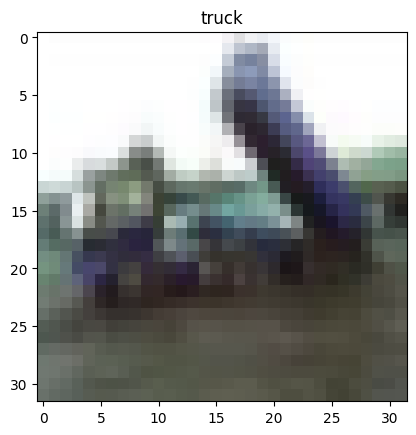

In [5]:
# Let's check the very first image data
data= x[2]
label= np.argmax(y[2])
print(data)
print(label)

rgb_img= cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
plt.title(class_names[label])
plt.imshow(rgb_img)
plt.show()

In [6]:
# Tensorflow also provides built-in functions for Data augmentation, but as of now I'm still learning to work with it.
# The idea is that, I will increase the size of the training dataset by keeping the orginal image and it's flipped image

def flip_image(img):
    return cv2.flip(img, 1)  # Flip the image left to right

# Lists for augmented data
augmented_images= []
augmented_labels= []

# Augment each image
for i in range(len(x)):
    img= x[i]
    label= y[i]

    # Original
    augmented_images.append(img)
    augmented_labels.append(label)

    # flipped image
    rotated_plus= flip_image(img)
    augmented_images.append(rotated_plus)
    augmented_labels.append(label)      # Label remains the same

# Convert to NumPy arrays
x_aug= np.array(augmented_images)
x_aug_norm= x_aug.astype("float32") / 255.0        # Normalization
x_test_norm= x_test.astype("float32") / 255.0

y_aug= np.array(augmented_labels)

print("Original dataset size:", x.shape)
print("Augmented dataset size:", x_aug.shape)

Original dataset size: (50000, 32, 32, 3)
Augmented dataset size: (100000, 32, 32, 3)


In [7]:
from sklearn.model_selection import train_test_split as tts

x_train, x_val, y_train, y_val= tts(x_aug_norm, y_aug, test_size=0.2, random_state=42)

print("Training data shape:", x_train.shape)
print("Validation data shape:", x_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)

Training data shape: (80000, 32, 32, 3)
Validation data shape: (20000, 32, 32, 3)
Training labels shape: (80000, 10)
Validation labels shape: (20000, 10)


**Tensorflow utility**

>layers.Conv2D(< number of features >, < kernel shape >, < activation fxn >, < input_shape >) # CreateS Convlutional layers

>layers.MaxPooling2D(< kernel shape >) # Picks the max value of pixel in a window(dominant feature)

>layers.Flatten() # Converts the 2D data to 1D to feed it in the NN.

> layers.Dense(< No. of neurons >, < activation fxn > )

here We are using Conv2D and MaxPooling2D because our data is 2D in spacial domain.

In [11]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

C:\Users\AYUSH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,506 (1.29 MB)

 Trainable params: 338,506 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    batch_size=64)

_m_='cifar_cnn.keras'
model.save(_m_)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - accuracy: 0.4076 - loss: 1.6163 - val_accuracy: 0.6365 - val_loss: 1.0413
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.6562 - loss: 0.9761 - val_accuracy: 0.7025 - val_loss: 0.8520
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.7210 - loss: 0.7967 - val_accuracy: 0.7349 - val_loss: 0.7688
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.7536 - loss: 0.7002 - val_accuracy: 0.7488 - val_loss: 0.7366
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.7830 - loss: 0.6186 - val_accuracy: 0.7594 - val_loss: 0.7054
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.8050 - loss: 0.5580 - val_accuracy: 0.7679 - val_loss: 0.6772
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - accuracy: 0.8186 - loss: 0.5111 - val_accuracy: 0.7696 - val_loss: 0.6735
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.8334 -

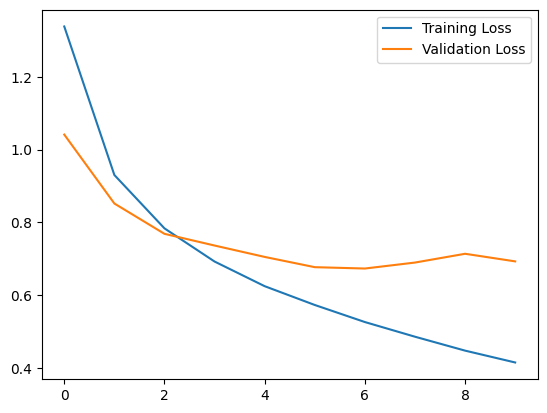

In [14]:
# Plot training/validation loss and accuracy:

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [17]:
from tensorflow import keras

_m_='cifar_cnn.keras'
# Load the saved model
model = keras.models.load_model(_m_)

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# One-hot encoded Y_test
if y_test.ndim > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [18]:
# Test Accuracy

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5285 - loss: 194.3777
Test Accuracy: 0.5265


In [20]:
# Precision, Recall & F1-Score

from sklearn.metrics import (
            precision_score, recall_score, f1_score)

precision= precision_score(y_test_classes, y_pred_classes, average='macro')
recall= recall_score(y_test_classes, y_pred_classes, average='macro')
f1= f1_score(y_test_classes, y_pred_classes, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.5846
Recall: 0.5265
F1-Score: 0.5054


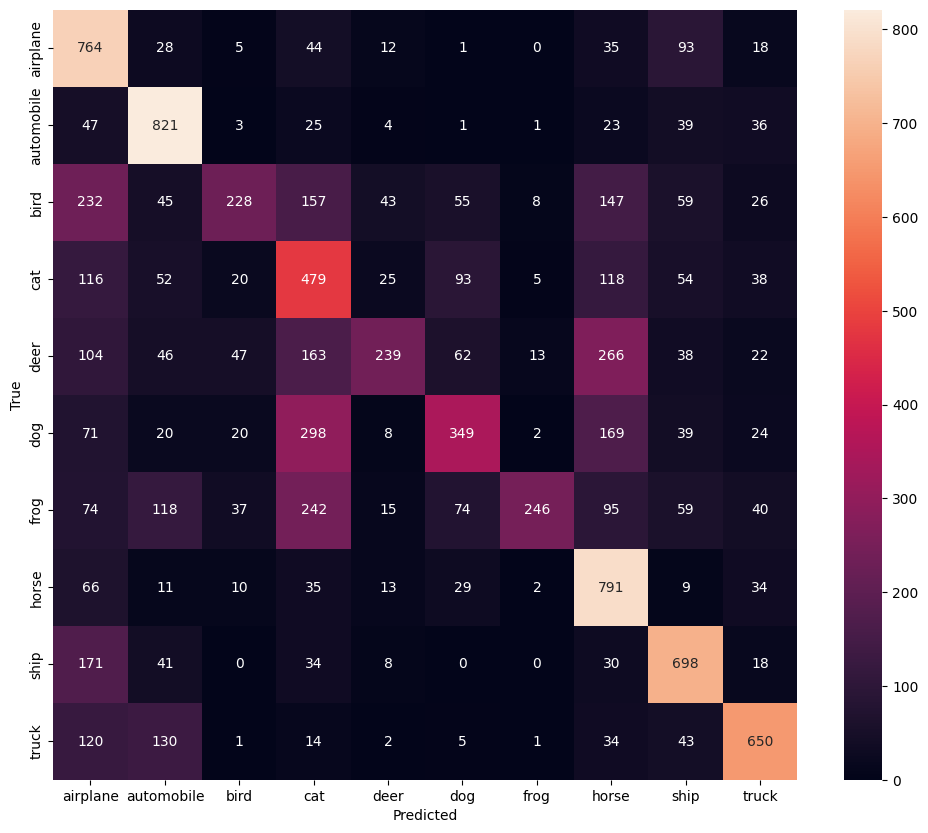

In [ ]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm= confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plt.savefig('confusion_Matrix.png')

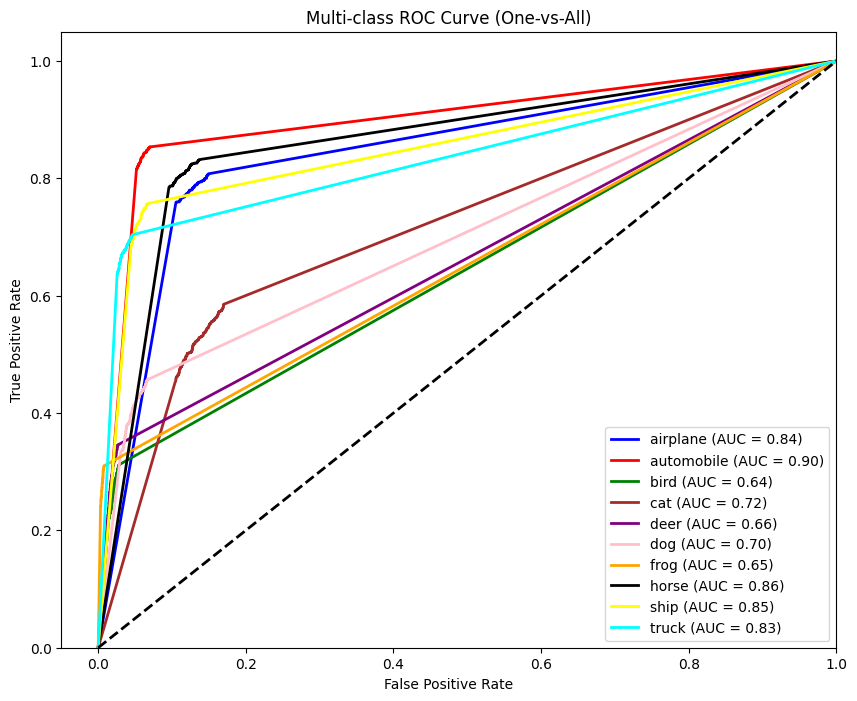

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output
y_test_bin= label_binarize(y_test_classes, classes=range(10))
y_pred_bin = y_pred  # Already probability outputs

# Compute ROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:,i], y_pred_bin[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10,8))
colors = cycle(['blue', 'red', 'green', 'brown', 'purple', 
               'pink', 'orange', 'black', 'yellow', 'cyan'])

for i, color, class_name in zip(range(10), colors, class_names):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='{0} (AUC = {1:0.2f})'
             .format(class_name, roc_auc[i]))

plt.plot([0,1],[0,1],'k--', lw=2)
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve (One-vs-All)')
plt.legend(loc="lower right")
plt.show()
plt.savefig('ROC_Curve.png')
